# ML - Task1- Measures of Descriptive statistics-Central Tendency, spread 

# Nirmal Thambi D16


You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:
Detect the outliers and remove it using:
 Mean Function
Percentile method
IQR(Inter quartile range method)
Normal distribution
Zscore method
Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))
Check the correlation between all the numerical columns and plot heatmap.
Scatter plot between the variables to check the correlation between them.



Loading the Data: The dataset contains property prices in Bangalore. Each row likely represents a property, and columns may include features such as location, area, number of bedrooms, price, etc.

In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("house_price.csv")

# Display the first few rows of the dataset to understand its structure
print(data.head())



                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


Summary Statistics: The describe() function provides summary statistics such as count, mean, standard deviation, minimum, maximum, and quartiles for numerical columns. This helps in understanding the distribution and range of the data.

In [22]:
# Summary statistics
print(data.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


Outlier Detection and Removal:
Mean Function: Outliers are detected by considering data points that lie beyond two standard deviations from the mean. These outliers are then removed.

Percentile Method: Outliers are detected based on the interquartile range (IQR) and removed if they fall outside 1.5 times the IQR.

IQR Method: Similar to the percentile method, outliers are detected and removed based on the IQR.

Normal Distribution: Outliers are identified by comparing the data points' cumulative distribution function (CDF) with a normal distribution. Data points with a CDF significantly different from the normal distribution are considered outliers and removed.

Z-score Method: Outliers are detected based on the z-scores of data points. Data points with a z-score greater than a threshold (typically 3) are considered outliers and removed.

In [23]:
# Method 1: Mean Function
mean = data['price_per_sqft'].mean()
std_dev = data['price_per_sqft'].std()
data_mean_method = data[(data['price_per_sqft'] > (mean - 2 * std_dev)) & (data['price_per_sqft'] < (mean + 2 * std_dev))]

In [24]:
# Method 2: Percentile method
percentile_25 = data['price_per_sqft'].quantile(0.25)
percentile_75 = data['price_per_sqft'].quantile(0.75)
iqr = percentile_75 - percentile_25
lower_limit = percentile_25 - 1.5 * iqr
upper_limit = percentile_75 + 1.5 * iqr
data_percentile_method = data[(data['price_per_sqft'] > lower_limit) & (data['price_per_sqft'] < upper_limit)]

In [25]:
# Method 3: IQR (Inter quartile range method)
q1 = data['price_per_sqft'].quantile(0.25)
q3 = data['price_per_sqft'].quantile(0.75)
iqr = q3 - q1
data_iqr_method = data[(data['price_per_sqft'] > (q1 - 1.5 * iqr)) & (data['price_per_sqft'] < (q3 + 1.5 * iqr))]



In [26]:
# Method 4: Normal distribution
from scipy.stats import norm
data_normal_method = data[(np.abs(norm.cdf(data['price_per_sqft']) - 0.5) < 2 * norm.pdf(data['price_per_sqft']))]

In [27]:
# Method 5: Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(data['price_per_sqft']))
threshold = 3
data_zscore_method = data[(z_scores < threshold)]

Correlation Heatmap: The heatmap visualizes the correlation between numerical columns using a color scale. Positive correlations are indicated by warmer colors (closer to 1), while negative correlations are indicated by cooler colors (closer to -1). A correlation close to 0 indicates no linear relationship between the columns.

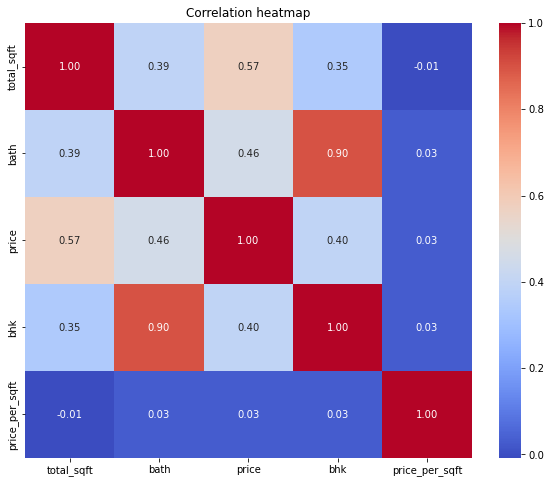

In [28]:
# Heatmap to check correlation between numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap')
plt.show()


Pairplot:
The pairplot shows scatter plots between all pairs of numerical columns in the dataset.
Each scatter plot represents the relationship between two variables, with one variable on the x-axis and the other on the y-axis.
It helps in visualizing the correlations and identifying any linear relationships or patterns between variables.

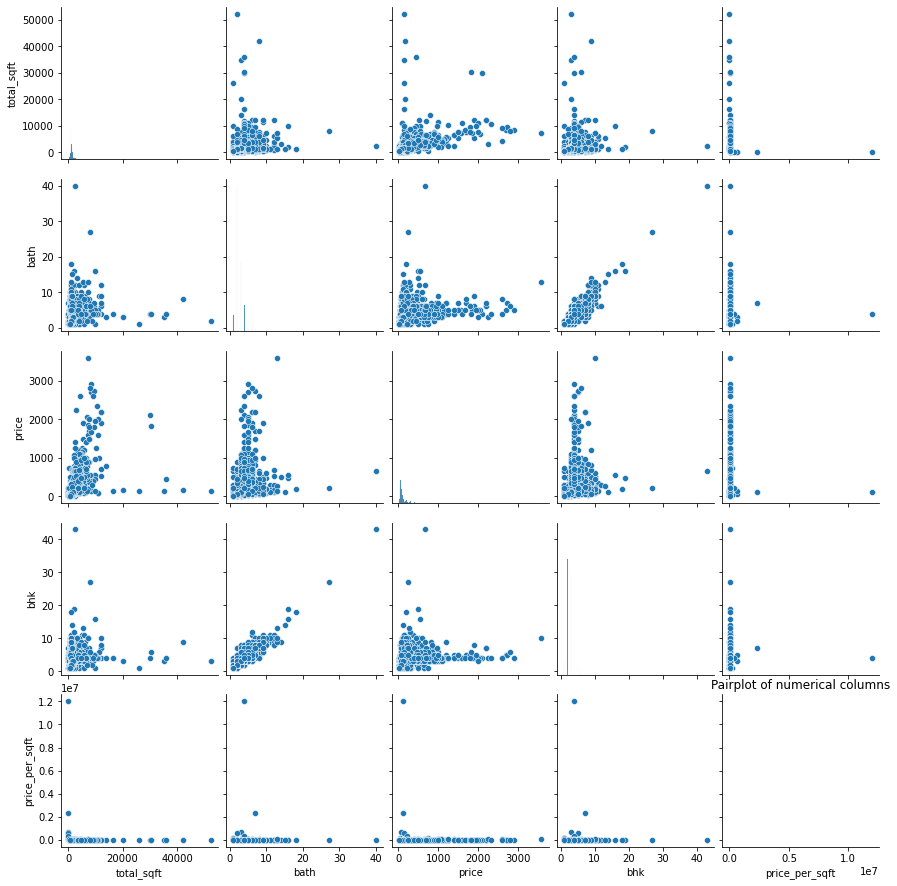

In [29]:
# Scatter plot between numerical columns
sns.pairplot(data)
plt.title('Pairplot of numerical columns')
plt.show()

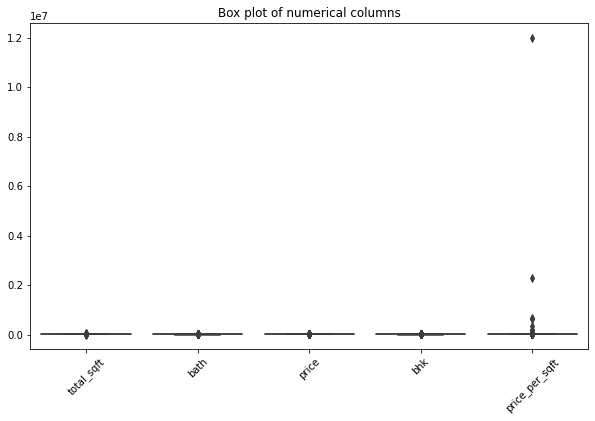

In [30]:
# Box plot for all numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Box plot of numerical columns')
plt.xticks(rotation=45)
plt.show()

Histogram of Price per sqft:
The histogram visualizes the frequency distribution of prices per square foot.
Each bar represents a range of price per sqft values, and the height of the bar indicates the frequency of occurrence within that range.
It helps in understanding the distribution of prices and identifying any patterns or deviations from normality.

In [31]:
# Histogram plot to check the normality of the price per sqft column
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
sns.histplot(data['price_per_sqft'], kde=True)
plt.title('Histogram of Price per sqft')
plt.xlabel('Price per sqft')
plt.ylabel('Frequency')

# Customize x-axis tick marks
plt.xticks(np.arange(0, data['price_per_sqft'].max()+50, 50))

plt.show()


KeyboardInterrupt: 

# ML - Task2 - Hypothesis testing
Q1.Suppose a child psychologist claims that the average time working mothers spend talking to their children is at least 11 minutes per day. You conduct a random sample of 1000 working mothers and find they spend an average of 11.5 minutes per day talking with their children. Assume prior research suggests the population standard deviation is 2.3 minutes.Conduct a test with a level of significance of alpha = 0.05.

Q2. A coffee shop claims that their average wait time for customers is less than 5 minutes. To test this claim, a sample of 40 customers is taken, and their wait times are recorded. The sample mean wait time is found to be 4.6 minutes with a standard deviation of 0.8 minutes. Perform a hypothesis test at a significance level of 0.05 and determine whether there is enough evidence to support the coffee shop's claim.

In [1]:
from scipy import stats
import math


In [2]:

# Q1
# Given data
x_bar1 = 11.5  # Sample mean
mu1 = 11       # Population mean according to the null hypothesis
sigma1 = 2.3   # Population standard deviation
n1 = 1000      # Sample size
alpha1 = 0.05  # Significance level

# Calculate the Z-value
Z1 = (x_bar1 - mu1) / (sigma1 / math.sqrt(n1))

# Calculate the critical Z-value for alpha = 0.05 (one-tailed test)
critical_Z1 = stats.norm.ppf(alpha1)

# Perform hypothesis test
if Z1 < critical_Z1:
    print("Q1: Reject the null hypothesis. There is sufficient evidence to support the claim.")
else:
    print("Q1: Fail to reject the null hypothesis. There is not sufficient evidence to support the claim.")



Q1: Fail to reject the null hypothesis. There is not sufficient evidence to support the claim.


In [3]:
# Q2
# Given data
x_bar2 = 4.6    # Sample mean
mu2 = 5        # Population mean according to the null hypothesis
s2 = 0.8       # Sample standard deviation
n2 = 40        # Sample size
alpha2 = 0.05  # Significance level

# Calculate the Z-value
Z2 = (x_bar2 - mu2) / (s2 / math.sqrt(n2))

# Calculate the critical Z-value for alpha = 0.05 (one-tailed test)
critical_Z2 = stats.norm.ppf(alpha2)

# Perform hypothesis test
if Z2 < critical_Z2:
    print("Q2: Reject the null hypothesis. There is sufficient evidence to support the claim.")
else:
    print("Q2: Fail to reject the null hypothesis. There is not sufficient evidence to support the claim.")


Q2: Reject the null hypothesis. There is sufficient evidence to support the claim.


# ML - Task3 - Data Preprocessing
Objective:
The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

Key Components to be fulfilled:

Data Exploration:   Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.

Data Cleaning:
Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers.
Replace the value 0 in age as NaN
Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

Data Analysis:
Filter the data with age >40 and salary<5000
Plot the chart with age and salary
Count the number of people from each place and represent it visually

Data Encoding:
Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.
Feature Scaling:
After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
data = pd.read_csv("Employee.csv")

In [2]:
data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [3]:
# Data Exploration
print("Unique values and length of each feature:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"{column}: {unique_values}, Length: {len(unique_values)}")

Unique values and length of each feature:
Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'], Length: 7
Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.], Length: 30
Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.], Length: 41
Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'], Length: 12
Country: ['India'], Length: 1
Gender: [0 1], Length: 2


In [4]:
# Statistical analysis and renaming of columns
print("\nStatistical analysis:")
print(data.describe())


Statistical analysis:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000  3030.000000    0.000000
50%     32.500000  5000.000000    0.000000
75%     37.750000  8000.000000    0.000000
max     54.000000  9876.000000    1.000000


In [5]:
# Renaming columns
data.rename(columns={"Company": "Organization", "Place": "City"}, inplace=True)


In [6]:
# Data Cleaning
# Replace 0 in Age and Salary with NaN
cols_to_replace = ['Age', 'Salary']
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)


In [18]:
data.head()

,Organization,Age,Salary,City,Country,Gender
0,TCS,0.081081,0.480650,Chennai,India,NaN
1,Infosys,0.351351,0.480650,Mumbai,India,NaN
2,TCS,0.486486,0.137817,Calcutta,India,NaN
3,Infosys,0.621622,0.217480,Delhi,India,NaN
4,TCS,0.162162,0.331285,Mumbai,India,NaN


In [7]:
# Treat null values for numerical columns (excluding Gender)
numerical_columns = data.select_dtypes(include=np.number).columns
numerical_columns = numerical_columns.drop('Gender')  # Exclude 'Gender' column
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

In [8]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)


In [9]:
# Find outliers (assuming Age and Salary are numerical columns)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

C:\Users\Dell\AppData\Local\Temp/ipykernel_19592/3840232450.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)


In [10]:
# Data Analysis
# Filter data with age > 40 and salary < 5000
filtered_data = data[(data['Age'] > 40) & (data['Salary'] < 5000)]

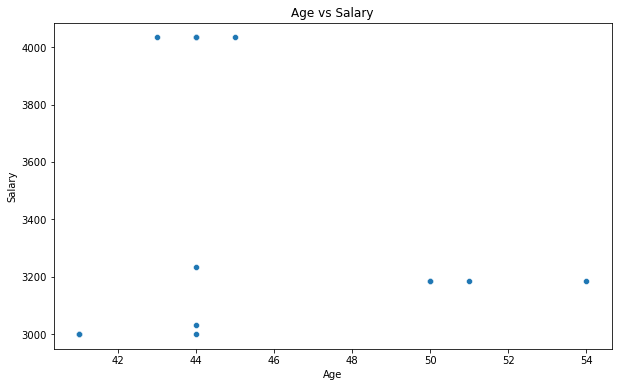

In [11]:
# Plot chart with Age and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=filtered_data)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


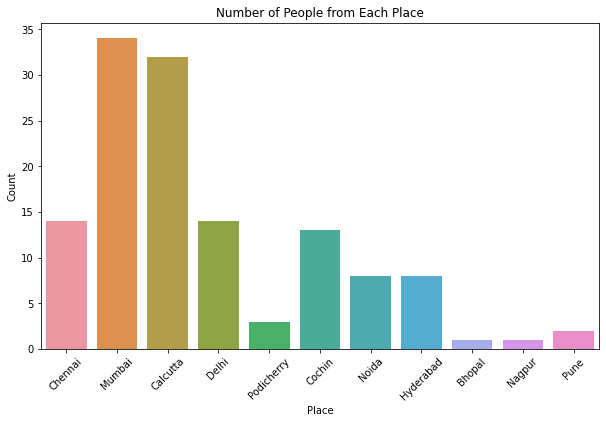

In [12]:
# Count number of people from each place and represent it visually
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=data)
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Data Encoding
# Convert Gender to 0s and 1s
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [14]:
# Feature Scaling
scaler = StandardScaler()
data[['Age', 'Salary']] = scaler.fit_transform(data[['Age', 'Salary']])

In [19]:
# Min-max scaling
min_max_scaler = MinMaxScaler()
data[['Age', 'Salary']] = min_max_scaler.fit_transform(data[['Age', 'Salary']])

# ML - Task4 - Regression

Problem Description
A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

• Which variables are significant in predicting the price of a car

• How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

In [1]:
# Step 2: Import necessary libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
# Load the dataset
df = pd.read_csv("CarPrice_Assignment.csv")

In [10]:
# Step 3: Data Exploration
print("Basic information about the dataset:")
print(data.info())








Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  engines

In [11]:

print("\nSummary statistics of numerical features:")
print(data.describe())


Summary statistics of numerical features:
           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   

In [12]:
print("\nCheck for missing values:")
print(data.isnull().sum())


Check for missing values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [13]:
print("\nCheck for duplicated rows:")
print(data.duplicated().sum())


Check for duplicated rows:
0


In [14]:

print("\nLength of unique values in each column:")
print(data.nunique())


Length of unique values in each column:
car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64


In [16]:
# Step 4: Data Preprocessing
#Drop car id
df.drop('car_ID', axis=1, inplace=True)


In [26]:
# Explore and preprocess categorical variables
# Extract the names of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_columns)


Categorical Columns: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [27]:
#Find unique values in categorical columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in CarName: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick s

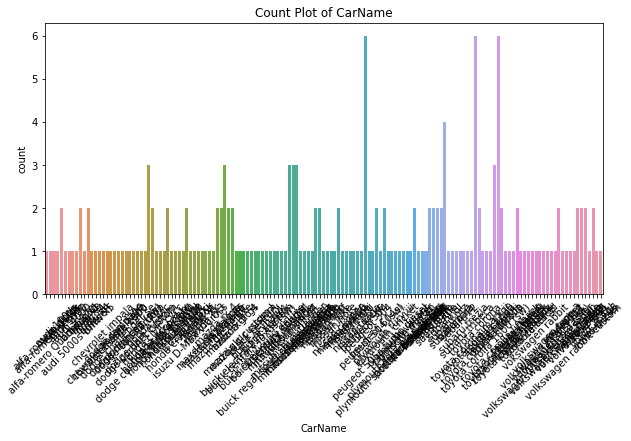

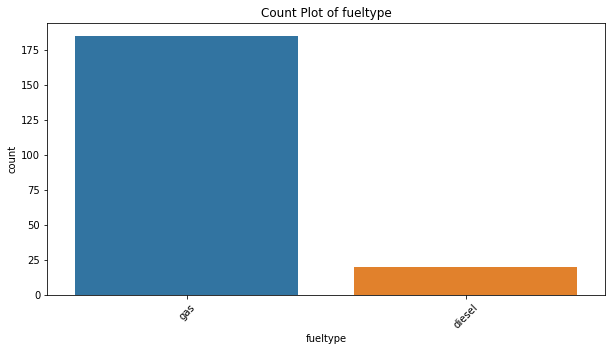

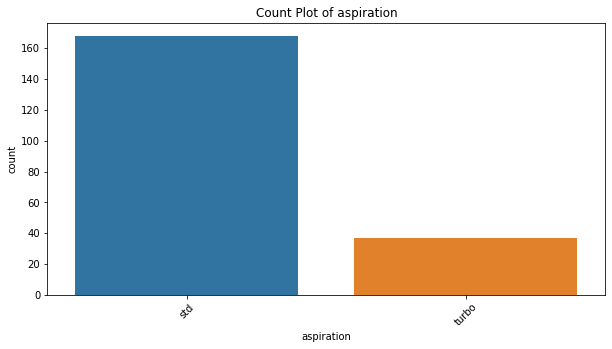

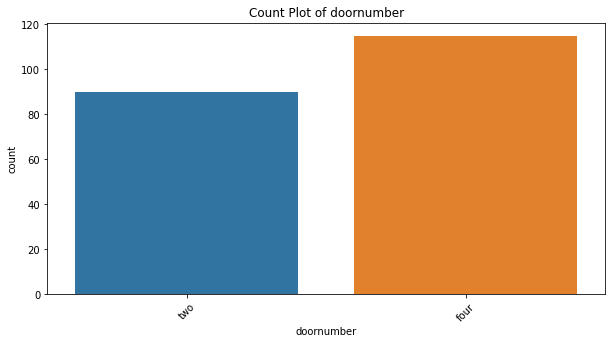

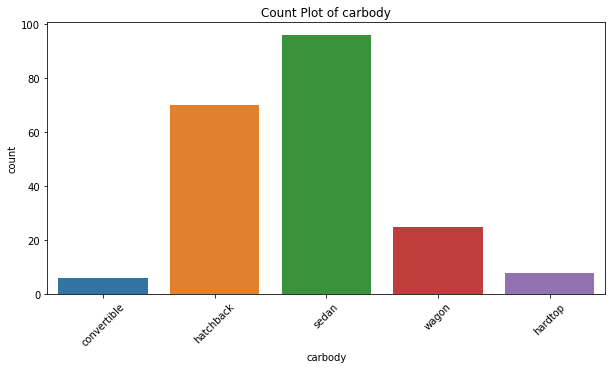

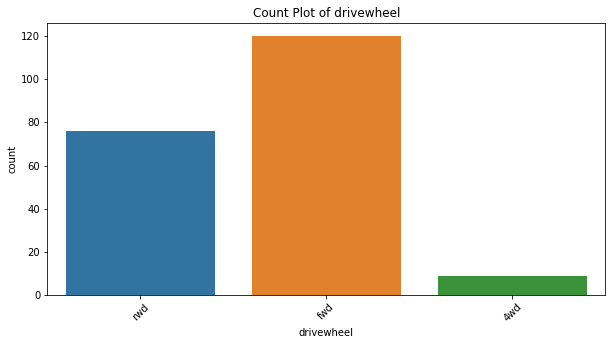

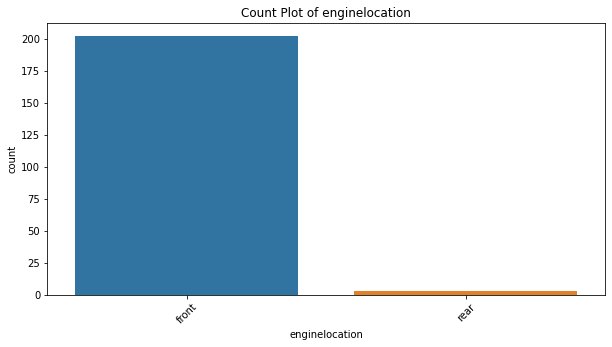

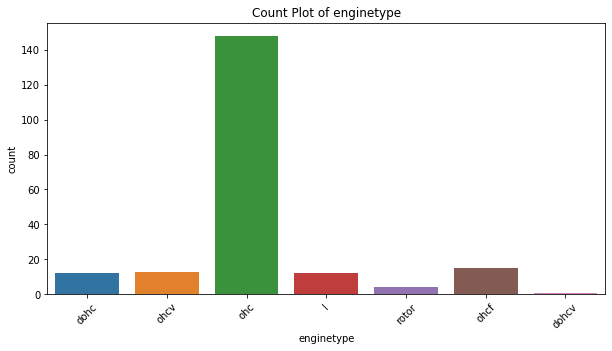

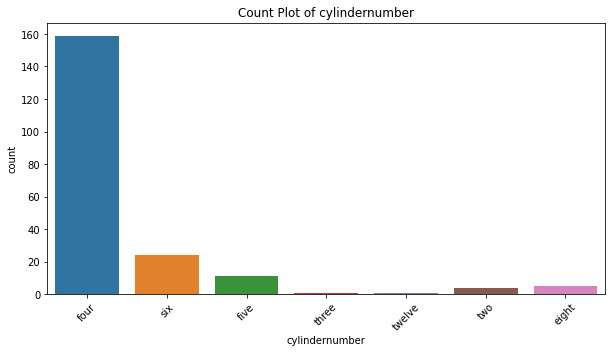

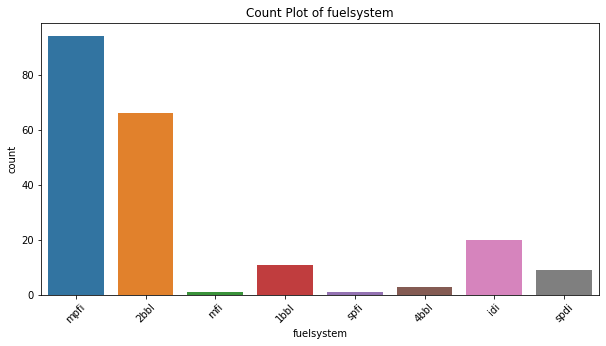

In [28]:
#Create count plot for categorical columns

for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [30]:
#Extract compony names from names
df['company'] = df['CarName'].apply(lambda x: x.split()[0])
df['company']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: company, Length: 205, dtype: object

In [31]:
#Remove car name coloumn
df.drop('CarName', axis=1, inplace=True)

In [34]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

In [35]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [36]:
#misspelled company names
df['company'] = df['company'].replace({

    "maxda": "mazda",
    "Nissan": "nissan",
    "porcshce": "porsche",
    "toyouta": "toyota",
    "vokswagen": "volkswagen",
    "vw": "volkswagen"
})




In [37]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [38]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label encoding to each categorical column
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Verify the encoded categorical columns
print(df.head())  # Display the first few rows of the DataFrame

   symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3         1           0           1        0           2   
1          3         1           0           1        0           2   
2          1         1           0           1        2           2   
3          2         1           0           0        3           1   
4          2         1           0           0        3           0   

   enginelocation  wheelbase  carlength  carwidth  ...  fuelsystem  boreratio  \
0               0       88.6      168.8      64.1  ...           5       3.47   
1               0       88.6      168.8      64.1  ...           5       3.47   
2               0       94.5      171.2      65.5  ...           5       2.68   
3               0       99.8      176.6      66.2  ...           5       3.19   
4               0       99.4      176.6      66.4  ...           5       3.19   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0    2.68    

In [39]:
# Outliers detection and removal (if present)

numeric_cols = df.select_dtypes(include=["int", "float"]).columns

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    df_without_outlier = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    print("Outliers in", col)
    print(outliers)
    
    print("Length of dataset before removing outliers:", len(df))
    print("Length of dataset after removing outliers:", len(df_without_outlier))
    print("Number of outliers:", len(df) - len(df_without_outlier))


Outliers in symboling
Empty DataFrame
Columns: [symboling, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price, company]
Index: []

[0 rows x 25 columns]
Length of dataset before removing outliers: 205
Length of dataset after removing outliers: 205
Number of outliers: 0
Outliers in fueltype
     symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
63           0         0           0           0        3           1   
66           0         0           0           0        3           2   
67          -1         0           1           0        3           2   
68          -1         0           1           0        4           2   
69           0         0           1           1        1           2   
70          -1         0           1           0        3  

In [52]:
# Load the dataset
data = pd.read_csv("CarPrice_Assignment.csv")

# Check the column names in the DataFrame
print(data.columns)

# Split the data into features (X) and the target variable (y)
X = data.drop(columns=['price'])  # Features (independent variables)
y = data['price']  # Target variable (dependent variable)

# Check the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')
Shape of X: (205, 25)
Shape of y: (205,)


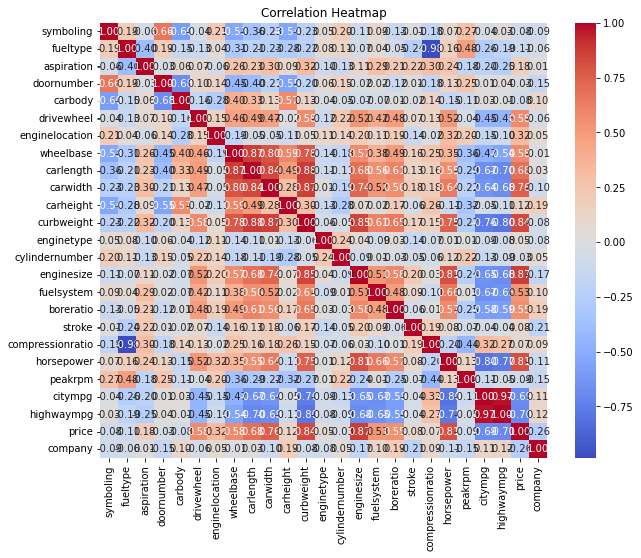

In [40]:
#Find corelation matrix
# Find correlation matrix
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# Create a mask to identify highly correlated features
mask = (correlation_matrix > 0.85) & (correlation_matrix < 1.0)

# Drop the columns with high correlation
drop_columns = set()
for col in correlation_matrix.columns:
    correlated_features = correlation_matrix.index[mask[col]]
    drop_columns.update(correlated_features)

df_filtered = df.drop(columns=drop_columns)

# Display the correlated features
print('Correlated features are:')
print(drop_columns)

# Display the DataFrame after removing highly correlated features
print("DataFrame after removing highly correlated features:")
print(df_filtered.head())


Correlated features are:
{'wheelbase', 'carwidth', 'curbweight', 'enginesize', 'price', 'citympg', 'carlength', 'highwaympg'}
DataFrame after removing highly correlated features:
   symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0          3         1           0           1        0           2   
1          3         1           0           1        0           2   
2          1         1           0           1        2           2   
3          2         1           0           0        3           1   
4          2         1           0           0        3           0   

   enginelocation  carheight  enginetype  cylindernumber  fuelsystem  \
0               0       48.8           0               2           5   
1               0       48.8           0               2           5   
2               0       52.4           5               3           5   
3               0       54.3           3               2           5   
4               0       54.3      

In [43]:
# Separate the features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and evaluation

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define a dictionary to store the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

# Iterate over each model
for name, model in models.items():
    print("Training", name)
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    print("Mean Squared Error for", name, ":", mse)


Training Linear Regression
Mean Squared Error for Linear Regression : 12163932.547871789
Training Decision Tree Regressor
Mean Squared Error for Decision Tree Regressor : 8565026.307363147
Training Random Forest Regressor
Mean Squared Error for Random Forest Regressor : 3359219.2505119946
Training Gradient Boosting Regressor
Mean Squared Error for Gradient Boosting Regressor : 5494597.146471132
Training Support Vector Regressor
Mean Squared Error for Support Vector Regressor : 86992752.81571177


Based on the MSE values, it seems that the Random Forest Regressor model performed the best among the models tested, as it has the lowest MSE. The Support Vector Regressor model has a significantly higher MSE compared to the other models, indicating poorer performance on this dataset.

# ML - Task5 - Classification and clustering
Problem Description
Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out the accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

Sepal Length

Sepal Width

Petal length

Petal width

Using above 4 features you will classify a flower  in one of the three categories,

Setosa

Versicolour

Virginica

In [45]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [46]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Step 3: Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Step 4: Evaluate the accuracy of the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model:", accuracy)

Accuracy of the logistic regression model: 1.0


In [49]:
# Step 5: Predict the categories of new samples
new_samples = [
    [5.1, 3.5, 1.4, 0.2],  # Sample 1
    [6.2, 2.9, 4.3, 1.3],  # Sample 2
    [7.3, 2.8, 6.4, 2.0]   # Sample 3
]
predicted_categories = model.predict(new_samples)
print("Predicted categories of new samples:", predicted_categories)

Predicted categories of new samples: [0 1 2]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


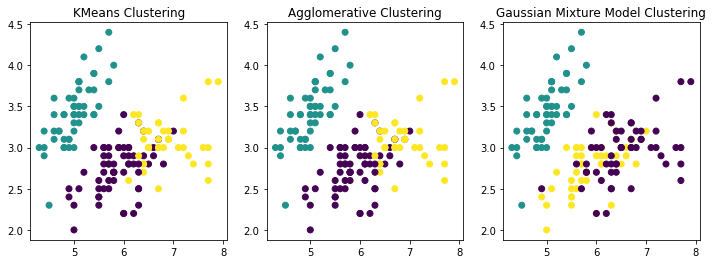

In [51]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Perform clustering using different algorithms
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X)

agg = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg.fit_predict(X)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_clusters = gmm.fit_predict(X)

# Visualize the clusters using the first two features
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_clusters, cmap="viridis")
plt.title('KMeans Clustering')

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=agg_clusters, cmap='viridis')
plt.title('Agglomerative Clustering')

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=gmm_clusters, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')

plt.show()

In [52]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for each clustering algorithm
kmeans_silhouette = silhouette_score(X, kmeans_clusters)
agg_silhouette = silhouette_score(X, agg_clusters)
gmm_silhouette = silhouette_score(X, gmm_clusters)

print("KMeans Clustering Silhouette Score:", kmeans_silhouette)
print("Agglomerative Clustering Silhouette Score:", agg_silhouette)
print("Gaussian Mixture Model Clustering Silhouette Score:", gmm_silhouette)


KMeans Clustering Silhouette Score: 0.5528190123564091
Agglomerative Clustering Silhouette Score: 0.5543236611296415
Gaussian Mixture Model Clustering Silhouette Score: 0.5011761635067201
